In [1]:
import numpy as np
import scipy as sp
from funcs import plot_settings
import matplotlib.pyplot as plt
plot_settings()


# Задачи
- Загрузить рандомный вариант (данные - случайная величина)
- Посмотреть на гистограмму
- Построить аппроксимацию (разложить данные по Фурье в моем случае) ps. границы и базис для каждого варианта разный, надо уточнить в задании
- Построить аппроксимацию по малой выборке (и понять, что она хуже)
- Построить аппроксимацию по малой выборке с помощью регуляризации (и понять, что она лучше предыдущей аппроксимации по малой выборке)  

In [2]:
# variant 8
data = np.load("data_v8.npy")

In [3]:
data.shape

(20000,)

In [4]:
max(data), min(data)

(3.1415428457311583, -3.141129141994909)

In [5]:
def a_b(x, k = 24):
    a, b = np.zeros((k, )), np.zeros((k, ))
    for i in range(k):
        a[i] = np.sum(np.cos(i*x))
        b[i] = np.sum(np.sin(i*x))
    return a/len(x), b/len(x)

In [6]:
a, b = a_b(data, k=24)


x = np.linspace(-np.pi, np.pi, 1000)
f = np.ones_like(x)*a[0]/np.pi/2

for k in range(1, len(a)):
    f += 1/np.pi*(a[k]*np.cos(k*x) + b[k]*np.sin(k*x))



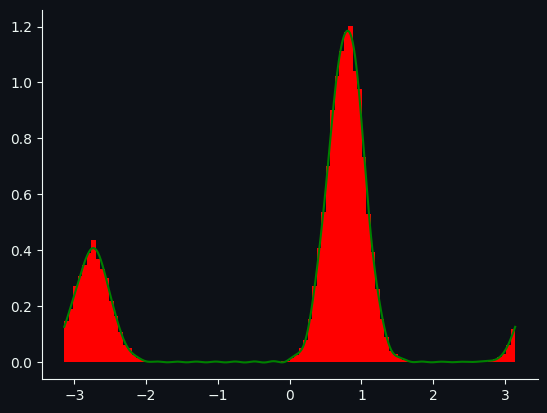

In [7]:
plt.plot(x, f)
res = plt.hist(data, bins=100, density=True)

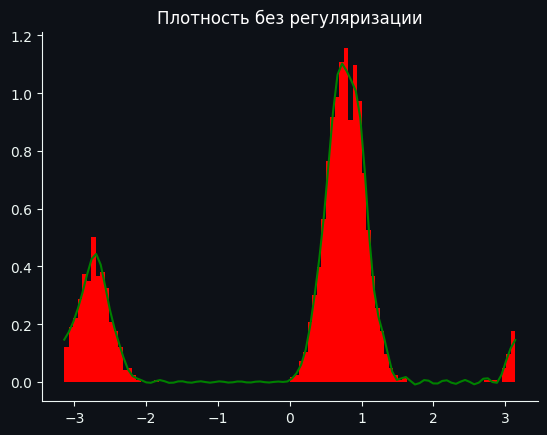

In [8]:
small_data = data[:2000]
np.random.shuffle(small_data)
a_small, b_small = a_b(small_data, k=24)


x_small = np.linspace(min(small_data), max(small_data), 100)
f_small = np.ones_like(x_small)*a_small[0]/np.pi/2

for k in range(1, len(a_small)):
    f_small += 1/np.pi*(a_small[k]*np.cos(k*x_small) + b_small[k]*np.sin(k*x_small))

plt.title("Плотность без регуляризации")

plt.plot(x_small, f_small)
res = plt.hist(small_data, bins=100, density=True)

In [9]:
def a_b_reg(x, k = 24, alp=1e-1):
    a, b = np.zeros((k, )), np.zeros((k, ))
    for i in range(k):
        a[i] = np.sum(np.cos(i*x))/(1+alp*i**2.1)
        b[i] = np.sum(np.sin(i*x))/(1+alp*i**2.1)
    return a/len(x), b/len(x)

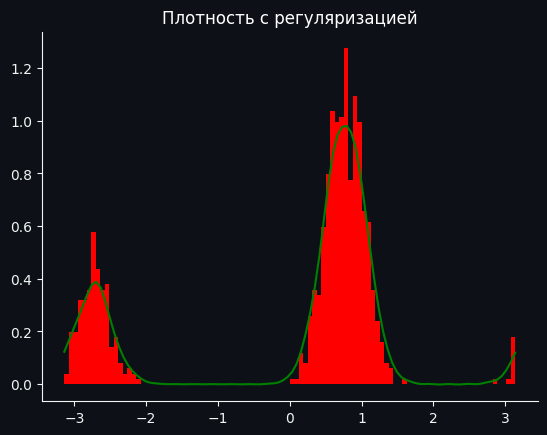

In [10]:
small_data = data[:800]
np.random.shuffle(small_data)
a_small, b_small = a_b_reg(small_data, k=24, alp=1e-2)


x_small = np.linspace(min(small_data), max(small_data), 100)
f_small_reg = np.ones_like(x_small)*a_small[0]/np.pi/2

for k in range(1, len(a_small)):
    f_small_reg += 1/np.pi*(a_small[k]*np.cos(k*x_small) + b_small[k]*np.sin(k*x_small))


plt.title("Плотность с регуляризацией")

plt.plot(x_small, f_small_reg)
res = plt.hist(small_data, bins=100, density=True)

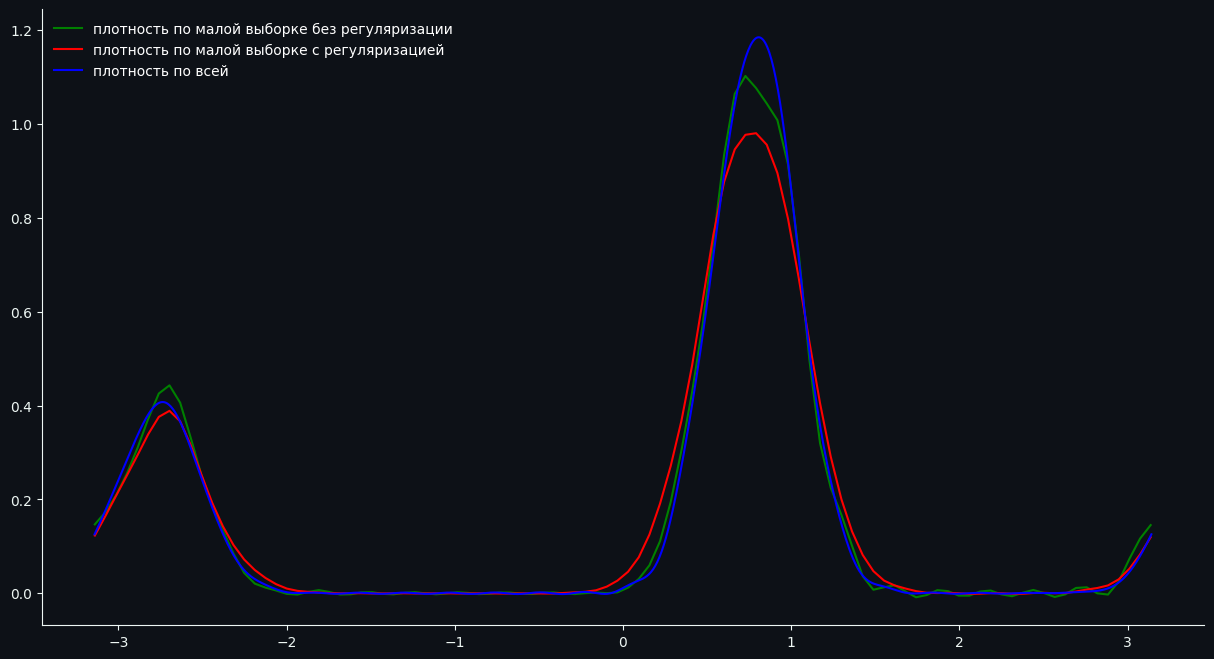

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(x_small, f_small, label='плотность по малой выборке без регуляризации')
plt.plot(x_small, f_small_reg, label='плотность по малой выборке с регуляризацией')
plt.plot(x, f, label='плотность по всей')
plt.legend(loc=2)

